# <span style='color:#00dd00'>Display the epoch and validation loss of the stored model</span>
## The first three models are presented in our paper.
## The next three models are retrained using the same method.

In [1]:
from main import *

if __name__ == '__main__':
    args.device = 'cuda:2'
    model_names = [
        # paper results
        'S CNN512 LSTM_384_Linear (norm n100) V2',
        'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) (data aug) feat_SmoothL1 V4',
        'S+E CNN512 EF cat0 LSTM_384_Linear (norm) (zero_pad) (data aug) V4',

        # test again
        'S CNN512 LSTM_384_L384_L384 (data aug)',
        'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug)',
        'S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug)',

    ]

    for model_name in model_names:
        model, e, v = MultiModal_SE().load_model(
            os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
            device=args.device
        )
        print('==============================')
        print(f'Epoch: {e}, valid loss: {v}\n')

Model './checkpoint/MultiModal/S CNN512 LSTM_384_Linear (norm n100) V2.pt' loaded.
Epoch: 8, valid loss: 0.4053343082688473

Model './checkpoint/MultiModal/S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) (data aug) feat_SmoothL1 V4.pt' loaded.
Epoch: 6, valid loss: 0.3652603574207535

Model './checkpoint/MultiModal/S+E CNN512 EF cat0 LSTM_384_Linear (norm) (zero_pad) (data aug) V4.pt' loaded.
Epoch: 680, valid loss: 0.34145800669987997

Model './checkpoint/MultiModal/S CNN512 LSTM_384_L384_L384 (data aug).pt' loaded.
Epoch: 10, valid loss: 0.4033030022404812

Model './checkpoint/MultiModal/S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug).pt' loaded.
Epoch: 3, valid loss: 0.3895334668181561

Model './checkpoint/MultiModal/S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug).pt' loaded.
Epoch: 33, valid loss: 0.37355029222038055



# <span style='color:#00dd00'>1. Use audio and EPG signals as input</span>
## 1.1 Evaluate the *baseline*, *EPG2S (LF)* and *EPG2S (EF)* models in the test set and save the results.

In [2]:
import os
import pickle

from model import MultiModal_SE
from preprocess import cache_clean_data
from utils import analyze
from main import args

if __name__ == '__main__':
    args.device = 'cuda:2'
    
    # ===== Load Test clean data =====
    print('Cache clean testing data ...')
    dataset = cache_clean_data(is_training=False, dataset_path=args.dataset_path, device=args.device)
    print(f"Test set size: {len(dataset['Test'])}")
    
    # ===== Test set performance =====
    model_name = 'S CNN512 LSTM_384_L384_L384 (data aug)'
#     model_name = 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug)'
#     model_name = 'S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug)'
    model, e, v = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
        device=args.device
    )
    print(f'Epoch: {e}, valid loss: {v}')
    
    analyze(
        model, dataset, model_name,
        processes=8,
        use_S=True,
        elec_only=False,
        use_griffin=False,
        evaluation_path=args.evaluation_path,
        dataset_path=args.dataset_path
    )

Cache clean testing data ...
Test set size: 70
Model './checkpoint/MultiModal/S CNN512 LSTM_384_L384_L384 (data aug).pt' loaded.
Epoch: 10, valid loss: 0.4033030022404812


## 1.2 Show the average results.

['n10dB', 'n5dB', '0dB', '5dB']
====
PESQ:
	Noisy :	[2.03542219 2.03542219 2.03542219 2.03542219]	2.03542219
	Audio2Speech :	[2.06041627 2.47464498 2.81918547 3.07804324]	2.6080724887549875
	EPG2S$_{LF}$ :	[2.40361936 2.67539053 2.93100919 3.14002272]	2.787510452632393
	EPG2S$_{EF}$ :	[2.33269725 2.67500681 2.96036973 3.20841665]	2.794122609921864
	Audio2Speech V2 :	[2.07962457 2.49491737 2.82965314 3.09520876]	2.6248509607144763
	EPG2S$_{LF}$ V2 :	[2.38187045 2.66274647 2.90913055 3.10245282]	2.764050071686506
	EPG2S$_{EF}$ V2 :	[2.31021514 2.64679256 2.91752493 3.12924689]	2.750944878693138
====
STOI:
	Noisy :	[0.56447199 0.56447199 0.56447199 0.56447199]	0.56447199
	Audio2Speech :	[0.57155337 0.70204302 0.78156572 0.82834085]	0.720875738452757
	EPG2S$_{LF}$ :	[0.6755023  0.74153069 0.79493369 0.83285787]	0.7612061406858368
	EPG2S$_{EF}$ :	[0.64705539 0.73724216 0.79841575 0.83865736]	0.7553426644927235
	Audio2Speech V2 :	[0.56833394 0.69621499 0.7778809  0.82511694]	0.71688669236798

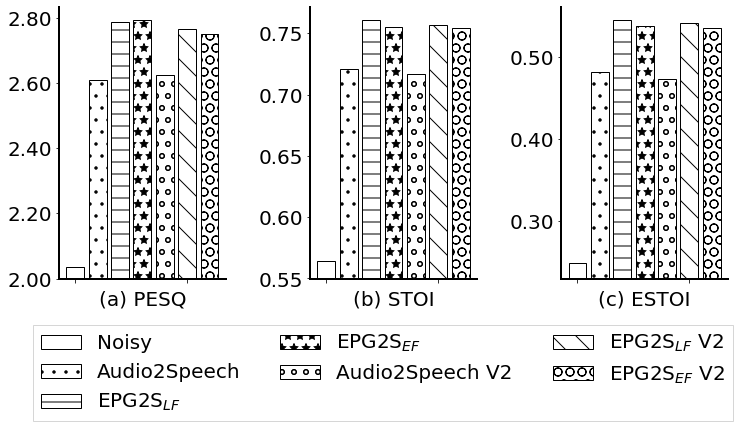

In [3]:
import matplotlib.pyplot as plt
from main import args, avg_analyze

if __name__ == '__main__':
    plt.rcParams.update({
        'font.size': 20,
        'axes.linewidth': 2,
        'legend.shadow':False,
        'legend.fancybox':False,
    })
    
    compare_dict = {
        'Noisy':        'Noisy',
        
        # paper results
        'Audio2Speech': 'S CNN512 LSTM_384_Linear (norm n100) V2',
        'EPG2S$_{LF}$': 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) (data aug) feat_SmoothL1 V4',
        'EPG2S$_{EF}$': 'S+E CNN512 EF cat0 LSTM_384_Linear (norm) (zero_pad) (data aug) V4',
        
        # test again
        'Audio2Speech V2': 'S CNN512 LSTM_384_L384_L384 (data aug)',
        'EPG2S$_{LF}$ V2': 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug)',
        'EPG2S$_{EF}$ V2': 'S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug)',
    }
    
    avg_analyze(
        compare_dict=compare_dict,
        evaluation_path=args.evaluation_path,
        metrics=['PESQ', 'STOI', 'ESTOI'],
        bottom={ 'PESQ': 2.0, 'STOI': 0.55, 'ESTOI': 0.23 },
        test_noise_type=[
            'car_noise_idle_noise_60_mph',
            'engine',
#             'pinknoise_16k',
#             'street',
            'street noise',
            'taiwan_3talker',
#             'white',
#             'none',
        ],
        test_SNR_type=['n10dB', 'n5dB', '0dB', '5dB'],
        patterns=' .-*o\\O/+ .-*o\\O/+',
        figsize=(12, 5),
        show='text/graph',
#         use_label=True,
#         save_dir='Test'
    )
    

# <span style='color:#00dd00'>2. Only use the EPG signal as input</span>
## 2.1 Evaluate the EPG2S (LF) and EPG2S (EF) models in the test set and save the results.

In [12]:
import os
import pickle

from model import MultiModal_SE
from preprocess import cache_clean_data
from utils import analyze
from main import args

if __name__ == '__main__':
    args.device = 'cuda:2'
    
    # ===== Load Test clean data =====
    print('Cache clean testing data ...')
    dataset = cache_clean_data(is_training=False, dataset_path=args.dataset_path, device=args.device)
    print(f"Test set size: {len(dataset['Test'])}")
    
    # ===== Test set performance =====
#     model_name = 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug)'
    model_name = 'S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug)'
    model, e, v = MultiModal_SE().load_model(
        os.path.join(args.MM_checkpoint_path, f'{model_name}.pt'),
        device=args.device
    )
    print(f'Epoch: {e}, valid loss: {v}')
    
    analyze(
        model, dataset, model_name,
        processes=8,
        use_S=False,
        elec_only=False,
        use_griffin=True,
        evaluation_path=args.evaluation_path,
        dataset_path=args.dataset_path
    )

Cache clean testing data ...
Test set size: 70
Model './checkpoint/MultiModal/S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad).pt' loaded.
Epoch: 33, valid loss: 0.37355029222038055


## Show the average results.

['n10dB', 'n5dB', '0dB', '5dB']
====
PESQ:
	EPG2S$_{baseline}$ :	[2.04581972 2.03465436 2.04777301 2.02847364]	2.0391801834106444
	EPG2S$_{LF}$ EPG :	[2.0501621  2.04565133 2.05009094 2.04600702]	2.047977846435138
	EPG2S$_{EF}$ EPG :	[2.0061839  1.98992674 1.99514256 1.99200161]	1.9958137031112397
	EPG2S$_{baseline}$ V2 :	[2.03398979 2.02744417 2.03102809 2.04358412]	2.034011544925826
	EPG2S$_{LF}$ EPG V2 :	[2.00370006 2.02526083 2.01363141 2.03166002]	2.018563081536974
	EPG2S$_{EF}$ EPG V2 :	[1.96389851 1.97311661 1.96890541 1.97715913]	1.9707699128559657
====
STOI:
	EPG2S$_{baseline}$ :	[0.58308858 0.58219694 0.58309863 0.58362995]	0.5830035257145997
	EPG2S$_{LF}$ EPG :	[0.59252499 0.59210343 0.59234187 0.5911892 ]	0.5920398717311663
	EPG2S$_{EF}$ EPG :	[0.5884015  0.58677719 0.58739059 0.58839607]	0.5877413377187914
	EPG2S$_{baseline}$ V2 :	[0.59086984 0.5897207  0.58923106 0.59056844]	0.590097510065236
	EPG2S$_{LF}$ EPG V2 :	[0.58980582 0.58960512 0.59106087 0.59018123]	0.590163258

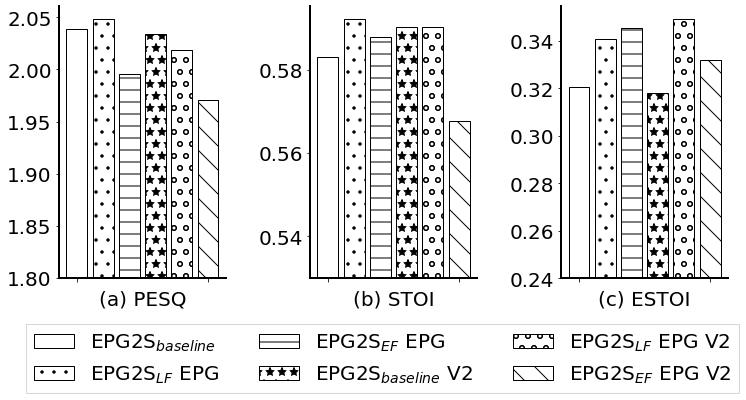

In [3]:
from main import *
import matplotlib.pyplot as plt

if __name__ == '__main__':
    plt.rcParams.update({
        'font.size': 20,
        'axes.linewidth': 2,
        'legend.shadow':False,
        'legend.fancybox':False,
    })
    
    compare_dict = {
        # paper results
        'EPG2S$_{baseline}$': 'E BiLSTM_512_512_L512 LSTM_384_Linear V6',
        'EPG2S$_{LF}$ EPG': 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_Linear (norm n100 fix) (zero_pad) (data aug) feat_SmoothL1 V4',
        'EPG2S$_{EF}$ EPG': 'S+E CNN512 EF cat0 LSTM_384_Linear (norm) (zero_pad) (data aug) V4',
        
        # test again
        'EPG2S$_{baseline}$ V2': 'E BiLSTM_512_512_L512 LSTM_384_L384 L257',
        'EPG2S$_{LF}$ EPG V2': 'S+E pre_CNN512 BiLSTM_512_512_L512 LF cat2 LSTM_384_L384 L384 (zero_pad) (data aug)',
        'EPG2S$_{EF}$ EPG V2': 'S+E L257 EF cat0 pre_CNN512_LSTM_384_L384 L257 (zero_pad) (data aug)',
    }
    
    avg_analyze(
        compare_dict=compare_dict,
        evaluation_path=args.evaluation_path,
        metrics=['PESQ', 'STOI', 'ESTOI'],
        bottom={ 'PESQ': 1.8, 'STOI': 0.53, 'ESTOI': 0.24 },
        test_noise_type=['none'],
        test_SNR_type=['n10dB', 'n5dB', '0dB', '5dB'], #'10dB'],
        patterns=' .-*o\\O/+ .-*o\\O/+',
        figsize=(12, 5),
        show='text/graph',
#         use_label=True,
#         save_dir='Test'
    )
    